<a href="https://colab.research.google.com/github/Noob919/IoT_Security_Project/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

In [180]:
import os
import dask.dataframe as dd

# Set the dataset directory
DATASET_DIRECTORY = '/content/drive/MyDrive/Data/'

# Importing Dataset

df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets) * 0.8)]
test_sets = df_sets[int(len(df_sets) * 0.8):]

# Create a Dask DataFrame for training data
training_dataframes = [dd.read_csv(DATASET_DIRECTORY + train_set) for train_set in training_sets]

# Concatenate all Dask DataFrames into a single training Dask DataFrame
training_data = dd.concat(training_dataframes, axis=0)

# Compute summary statistics
summary_stats = training_data.describe().compute()

In [181]:
summary_stats

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,...,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07,3.634642e+07
mean,5.776241e+00,7.669673e+04,9.066452e+00,6.635099e+01,9.055259e+03,9.055259e+03,5.906723e-06,8.656754e-02,2.073098e-01,9.049695e-02,...,1.246705e+02,3.333304e+01,1.246947e+02,8.318599e+07,9.498651e+00,1.312189e+01,4.710645e+01,3.074485e+04,9.644400e-02,1.415166e+02
std,2.825513e+02,4.611977e+05,8.945459e+00,1.402003e+01,9.943559e+04,9.943559e+04,8.097916e-03,2.812003e-01,4.053794e-01,2.868924e-01,...,2.410143e+02,1.604007e+02,2.415784e+02,1.704543e+07,8.190662e-01,8.628687e+00,2.268605e+02,3.258548e+05,2.330306e-01,2.106605e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.139973e+00,2.139973e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307200e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.606355e+01,1.606355e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312463e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.078261e-01,4.161725e+02,1.524000e+01,6.400000e+01,1.230812e+02,1.230812e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405734e+01,3.955494e-01,5.406000e+01,8.334402e+07,9.500000e+00,1.039739e+01,5.303656e-01,1.516787e+00,8.000000e-02,1.415500e+02
max,2.629164e+05,9.907148e+06,4.700000e+01,2.550000e+02,8.388608e+06,8.388608e+06,2.971522e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.160047e+04,1.238524e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.453904e+02,1.755127e+04,1.549022e+08,1.000000e+00,2.446000e+02


In [182]:
column_names = training_data.columns

# Print the column names
print(column_names)

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')


In [183]:
# Assuming you have a Dask DataFrame named training_data
unique_labels = training_data['label'].unique().compute()

# Print the unique label values
for label in unique_labels:
    print(label)

DDoS-RSTFINFlood
DoS-TCP_Flood
DDoS-ICMP_Flood
DoS-UDP_Flood
DoS-SYN_Flood
Mirai-greeth_flood
DDoS-SynonymousIP_Flood
Mirai-udpplain
DDoS-SYN_Flood
DDoS-PSHACK_Flood
DDoS-TCP_Flood
DDoS-UDP_Flood
BenignTraffic
MITM-ArpSpoofing
DDoS-ACK_Fragmentation
Mirai-greip_flood
DoS-HTTP_Flood
DDoS-ICMP_Fragmentation
Recon-PortScan
DNS_Spoofing
DDoS-UDP_Fragmentation
Recon-OSScan
XSS
DDoS-HTTP_Flood
Recon-HostDiscovery
CommandInjection
VulnerabilityScan
DDoS-SlowLoris
Backdoor_Malware
BrowserHijacking
DictionaryBruteForce
SqlInjection
Recon-PingSweep
Uploading_Attack


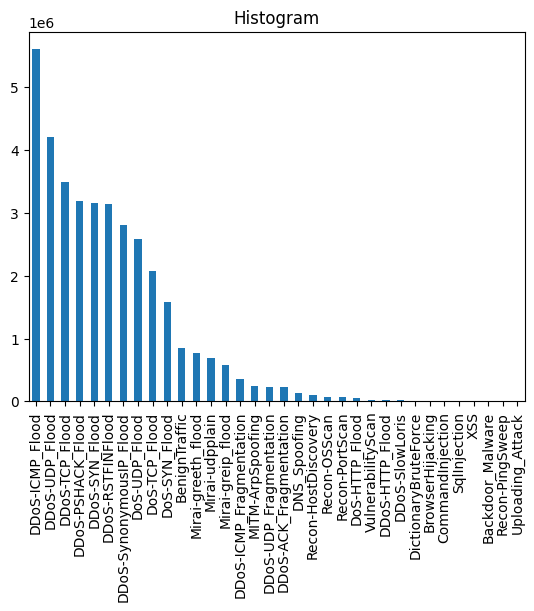

In [184]:
# Assuming you have a Dask DataFrame named training_data

# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = training_data['label'].value_counts().compute()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

# **DownSampling to 300 rows per label**

In [185]:
# List of label values you want to filter on
label_values_to_select = [
    'DDoS-RSTFINFlood',
    'DoS-TCP_Flood',
    'DDoS-ICMP_Flood',
    'DoS-UDP_Flood',
    'DoS-SYN_Flood',
    'Mirai-greeth_flood',
    'DDoS-SynonymousIP_Flood',
    'Mirai-udpplain',
    'DDoS-SYN_Flood',
    'DDoS-PSHACK_Flood',
    'DDoS-TCP_Flood',
    'DDoS-UDP_Flood',
    'BenignTraffic',
    'MITM-ArpSpoofing',
    'DDoS-ACK_Fragmentation',
    'Mirai-greip_flood',
    'DoS-HTTP_Flood',
    'DDoS-ICMP_Fragmentation',
    'Recon-PortScan',
    'DNS_Spoofing',
    'DDoS-UDP_Fragmentation',
    'Recon-OSScan',
    'XSS',
    'DDoS-HTTP_Flood',
    'Recon-HostDiscovery',
    'CommandInjection',
    'VulnerabilityScan',
    'DDoS-SlowLoris',
    'Backdoor_Malware',
    'BrowserHijacking',
    'DictionaryBruteForce',
    'SqlInjection',
    'Recon-PingSweep',
    'Uploading_Attack'
]

# Create an empty list to store selected rows
selected_rows = []

# Loop through each label value and select the first 300 rows for each
for label_value in label_values_to_select:
    label_rows = training_data[training_data['label'] == label_value].head(300)
    selected_rows.append(label_rows)

# Concatenate the selected rows into a single DataFrame
selected_data = dd.concat(selected_rows, axis=0)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: Insufficient elements for `head`. 300 elements requested, only 18 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: Insufficient elements for `head`. 300 elements requested, only 169 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: Insufficient elements for `head`. 300 elements requested, only 28 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: Insufficient elements for `head`. 300 elements requested, only 210 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:8110: UserWarning: 

In [186]:
selected_data.compute()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.0,6.0,64.0,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
35,0.000000,54.0,6.0,64.0,20.436094,20.436094,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334823e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
37,0.000000,54.0,6.0,64.0,24.207439,24.207439,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
39,0.000000,54.0,6.0,64.0,2.104608,2.104608,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334932e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
43,0.000000,54.0,6.0,64.0,32.396578,32.396578,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96701,284.814440,12346.4,8.8,81.8,0.499826,0.499826,0.0,0.0,0.0,0.0,...,62.599146,91.2,4.212329e-02,5.5,14.765014,88.528561,4425.654412,0.9,38.50,Uploading_Attack
121579,374.518416,4912.9,10.5,129.0,0.321006,0.321006,0.0,0.0,0.0,0.0,...,100.757301,163.3,1.676394e+08,13.5,15.872206,142.590233,10181.867510,1.0,244.60,Uploading_Attack
182469,490.964604,4429.8,11.9,83.0,0.048611,0.048611,0.0,0.0,0.0,0.0,...,83.594679,157.4,1.676394e+08,13.5,16.808937,118.500440,7031.081154,1.0,244.60,Uploading_Attack
191132,284.569467,27451.6,7.1,106.7,21.693326,21.693326,0.0,0.0,0.0,0.0,...,325.556061,248.9,1.676394e+08,13.5,20.652429,461.348882,110948.508947,1.0,244.60,Uploading_Attack


In [187]:
selected_summary = selected_data.describe().compute()

In [188]:
selected_summary

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7591.000000,7.591000e+03,7591.000000,7591.000000,7.591000e+03,7.591000e+03,7591.0,7591.000000,7591.000000,7591.000000,...,7591.000000,7591.000000,7591.000000,7.591000e+03,7591.000000,7591.000000,7591.000000,7.591000e+03,7591.000000,7591.000000
mean,67.196283,2.475384e+05,11.132034,74.603359,5.073378e+03,5.073378e+03,0.0,0.039784,0.149914,0.064945,...,341.460195,175.594857,343.323598,8.272047e+07,9.472309,21.583973,248.225231,1.478771e+05,0.436378,140.829544
std,1310.052823,8.648826e+05,11.118741,28.392076,4.676909e+04,4.676909e+04,0.0,0.195464,0.357011,0.246446,...,429.168277,311.155963,434.828820,4.287082e+07,2.056735,14.110919,440.122815,4.948761e+05,0.438924,52.991965
min,0.000000,0.000000e+00,0.960000,2.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,1.382828e-06,5.500000,9.165151,0.000000,0.000000e+00,0.000000,38.500000
25%,0.003119,5.400000e+01,6.000000,64.000000,7.740759e+00,7.740759e+00,0.0,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.303338e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
50%,1.646827,9.314100e+03,6.800000,64.455000,3.966560e+01,3.966560e+01,0.0,0.000000,0.000000,0.000000,...,218.569099,58.999056,183.110000,8.333544e+07,9.500000,19.549974,83.528940,5.211671e+03,0.800000,141.550000
75%,25.415157,2.044970e+05,16.780000,95.950000,1.120847e+04,1.120847e+04,0.0,0.000000,0.000000,0.000000,...,868.406205,541.828252,800.015000,8.368154e+07,9.500000,38.213877,766.853126,3.163336e+05,0.950000,141.550000
max,68430.712218,9.366201e+06,47.000000,255.000000,1.468012e+06,1.468012e+06,0.0,1.000000,1.000000,1.000000,...,3753.921706,3439.690409,3668.500000,1.676394e+08,13.500000,86.571779,4864.456827,1.334536e+07,1.000000,244.600000


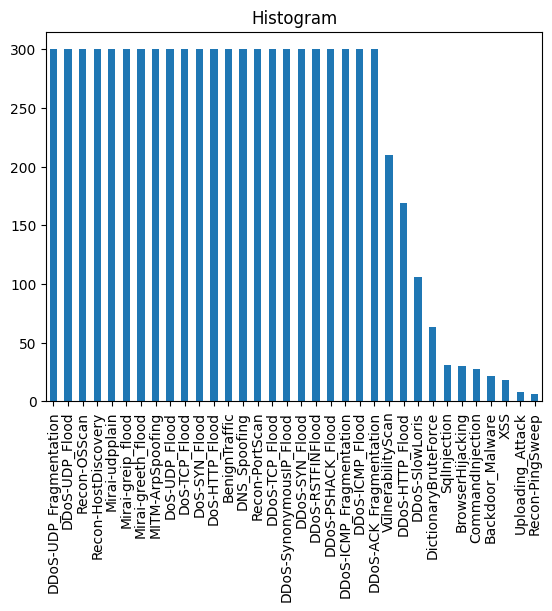

In [189]:
# Assuming you have a Dask DataFrame named training_data

# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = selected_data['label'].value_counts().compute()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [190]:
# Count the occurrences of each label in the selected_data DataFrame
label_counts = selected_data['label'].value_counts().compute()

In [191]:
# Get the labels that have at least 300 occurrences
labels_to_keep = label_counts[label_counts >= 300].index
labels_to_keep.to_list()

['DDoS-UDP_Fragmentation',
 'DDoS-UDP_Flood',
 'Recon-OSScan',
 'Recon-HostDiscovery',
 'Mirai-udpplain',
 'Mirai-greip_flood',
 'Mirai-greeth_flood',
 'MITM-ArpSpoofing',
 'DoS-UDP_Flood',
 'DoS-TCP_Flood',
 'DoS-SYN_Flood',
 'DoS-HTTP_Flood',
 'BenignTraffic',
 'DNS_Spoofing',
 'Recon-PortScan',
 'DDoS-TCP_Flood',
 'DDoS-SynonymousIP_Flood',
 'DDoS-SYN_Flood',
 'DDoS-RSTFINFlood',
 'DDoS-PSHACK_Flood',
 'DDoS-ICMP_Fragmentation',
 'DDoS-ICMP_Flood',
 'DDoS-ACK_Fragmentation']

In [192]:
# Filter the selected_data DataFrame to keep only rows with labels that have at least 300 occurrences
final_data = selected_data[selected_data['label'].isin(labels_to_keep)]
final_data.compute()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.0,6.0,64.0,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
35,0.000000,54.0,6.0,64.0,20.436094,20.436094,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334823e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
37,0.000000,54.0,6.0,64.0,24.207439,24.207439,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
39,0.000000,54.0,6.0,64.0,2.104608,2.104608,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334932e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
43,0.000000,54.0,6.0,64.0,32.396578,32.396578,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103118,21.038078,1739202.0,6.0,64.0,77.787519,77.787519,0.0,0.0,0.0,0.0,...,913.053258,1803.6,1.668466e+08,13.5,55.027266,1294.166075,844639.990937,1.0,244.60,Recon-HostDiscovery
103289,20.353031,577.8,6.0,92.8,157.977545,157.977545,0.0,0.0,0.0,0.0,...,2.287771,56.8,2.520585e-03,5.5,10.570508,3.235396,6.514864,0.9,38.50,Recon-HostDiscovery
103880,706.182840,124935.6,6.6,151.2,1.650240,1.650240,0.0,0.0,0.0,0.0,...,16.363884,81.5,4.387350e-02,5.5,12.371826,23.142027,392.098902,0.9,38.50,Recon-HostDiscovery
103921,66.277830,9645.0,5.4,51.5,14.128989,14.128989,0.0,0.0,0.0,0.0,...,38.609951,79.2,3.377700e-03,5.5,11.867010,54.602716,2910.644272,0.8,38.50,Recon-HostDiscovery


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['flow_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Header_Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Protocol Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['flow_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Header_Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Protocol Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['flow_duration', 'Header_Length'], ['Header_Length', 'Protocol Type'], ['Protocol Type', 'Duration'], ['Duration', 'Rate']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['Drate', 'flow_duration', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['Drate', 'Header_Length', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['Drate', 'Protocol Type', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['Drate', 'Duration', None], **{})
chart

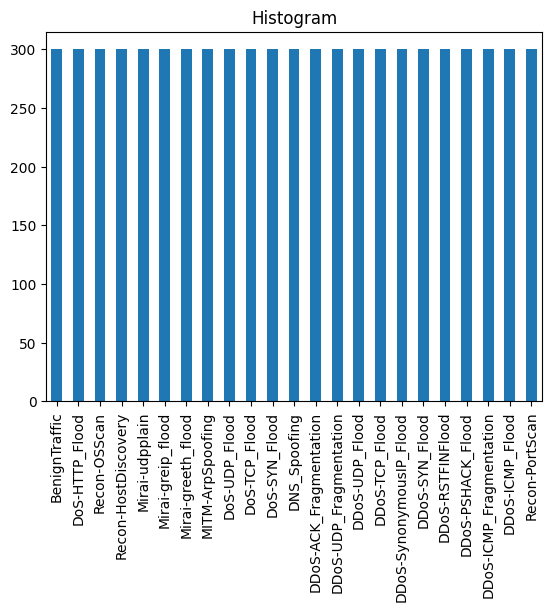

In [193]:
# Assuming you have a Dask DataFrame named training_data

# Compute the histogram using Dask and convert it to Pandas for plotting
histogram = final_data['label'].value_counts().compute()

# Create a bar plot (histogram)
histogram.plot(kind='bar', title='Histogram')
plt.show()

In [194]:
# Define a function to rename label values
def rename_ddos_labels(label):
    if label.startswith('DDos'):
        return 'DDos'
    else:
        return label

In [195]:
# Assuming 'final_data' is your Dask DataFrame
final_data['label'] = final_data['label'].str.replace(r'^DDos-.*', 'DDos', regex=True)

In [196]:
histogram

BenignTraffic              300
DoS-HTTP_Flood             300
Recon-OSScan               300
Recon-HostDiscovery        300
Mirai-udpplain             300
Mirai-greip_flood          300
Mirai-greeth_flood         300
MITM-ArpSpoofing           300
DoS-UDP_Flood              300
DoS-TCP_Flood              300
DoS-SYN_Flood              300
DNS_Spoofing               300
DDoS-ACK_Fragmentation     300
DDoS-UDP_Fragmentation     300
DDoS-UDP_Flood             300
DDoS-TCP_Flood             300
DDoS-SynonymousIP_Flood    300
DDoS-SYN_Flood             300
DDoS-RSTFINFlood           300
DDoS-PSHACK_Flood          300
DDoS-ICMP_Fragmentation    300
DDoS-ICMP_Flood            300
Recon-PortScan             300
Name: label, dtype: int64

In [197]:
final_data.compute()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.0,6.0,64.0,0.329807,0.329807,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
35,0.000000,54.0,6.0,64.0,20.436094,20.436094,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334823e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
37,0.000000,54.0,6.0,64.0,24.207439,24.207439,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
39,0.000000,54.0,6.0,64.0,2.104608,2.104608,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334932e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
43,0.000000,54.0,6.0,64.0,32.396578,32.396578,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103118,21.038078,1739202.0,6.0,64.0,77.787519,77.787519,0.0,0.0,0.0,0.0,...,913.053258,1803.6,1.668466e+08,13.5,55.027266,1294.166075,844639.990937,1.0,244.60,Recon-HostDiscovery
103289,20.353031,577.8,6.0,92.8,157.977545,157.977545,0.0,0.0,0.0,0.0,...,2.287771,56.8,2.520585e-03,5.5,10.570508,3.235396,6.514864,0.9,38.50,Recon-HostDiscovery
103880,706.182840,124935.6,6.6,151.2,1.650240,1.650240,0.0,0.0,0.0,0.0,...,16.363884,81.5,4.387350e-02,5.5,12.371826,23.142027,392.098902,0.9,38.50,Recon-HostDiscovery
103921,66.277830,9645.0,5.4,51.5,14.128989,14.128989,0.0,0.0,0.0,0.0,...,38.609951,79.2,3.377700e-03,5.5,11.867010,54.602716,2910.644272,0.8,38.50,Recon-HostDiscovery


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['flow_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['Header_Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['Protocol Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['flow_duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['Header_Length'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['Protocol Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['Duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_21, *[[['flow_duration', 'Header_Length'], ['Header_Length', 'Protocol Type'], ['Protocol Type', 'Duration'], ['Duration', 'Rate']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_22, *['Drate', 'flow_duration', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['Drate', 'Header_Length', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['Drate', 'Protocol Type', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['Drate', 'Duration', None], **{})
chart

In [198]:
# Create a new column 'new_label' based on the 'label' column
final_data['new_label'] = final_data['label'].apply(lambda x: 'DDos' if x.startswith('D') else 'other', meta=('new_label', 'object'))

# Compute the result
final_data = final_data.compute()
final_data

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,new_label
0,0.000000,54.0,6.0,64.0,0.329807,0.329807,0.0,1.0,0.0,1.0,...,54.0,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos
35,0.000000,54.0,6.0,64.0,20.436094,20.436094,0.0,1.0,0.0,1.0,...,54.0,8.334823e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos
37,0.000000,54.0,6.0,64.0,24.207439,24.207439,0.0,1.0,0.0,1.0,...,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos
39,0.000000,54.0,6.0,64.0,2.104608,2.104608,0.0,1.0,0.0,1.0,...,54.0,8.334932e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos
43,0.000000,54.0,6.0,64.0,32.396578,32.396578,0.0,1.0,0.0,1.0,...,54.0,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103118,21.038078,1739202.0,6.0,64.0,77.787519,77.787519,0.0,0.0,0.0,0.0,...,1803.6,1.668466e+08,13.5,55.027266,1294.166075,844639.990937,1.0,244.60,Recon-HostDiscovery,other
103289,20.353031,577.8,6.0,92.8,157.977545,157.977545,0.0,0.0,0.0,0.0,...,56.8,2.520585e-03,5.5,10.570508,3.235396,6.514864,0.9,38.50,Recon-HostDiscovery,other
103880,706.182840,124935.6,6.6,151.2,1.650240,1.650240,0.0,0.0,0.0,0.0,...,81.5,4.387350e-02,5.5,12.371826,23.142027,392.098902,0.9,38.50,Recon-HostDiscovery,other
103921,66.277830,9645.0,5.4,51.5,14.128989,14.128989,0.0,0.0,0.0,0.0,...,79.2,3.377700e-03,5.5,11.867010,54.602716,2910.644272,0.8,38.50,Recon-HostDiscovery,other


In [200]:
# Create a new column 'new_label' based on the 'label' column
final_data['multi_label'] = final_data['label'].apply(lambda x: 'DDos' if x.startswith('D') else 'other')

In [202]:
final_data

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,new_label,multi_label
0,0.000000,54.0,6.0,64.0,0.329807,0.329807,0.0,1.0,0.0,1.0,...,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos,DDos
35,0.000000,54.0,6.0,64.0,20.436094,20.436094,0.0,1.0,0.0,1.0,...,8.334823e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos,DDos
37,0.000000,54.0,6.0,64.0,24.207439,24.207439,0.0,1.0,0.0,1.0,...,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos,DDos
39,0.000000,54.0,6.0,64.0,2.104608,2.104608,0.0,1.0,0.0,1.0,...,8.334932e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos,DDos
43,0.000000,54.0,6.0,64.0,32.396578,32.396578,0.0,1.0,0.0,1.0,...,8.334498e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,DDoS-RSTFINFlood,DDos,DDos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103118,21.038078,1739202.0,6.0,64.0,77.787519,77.787519,0.0,0.0,0.0,0.0,...,1.668466e+08,13.5,55.027266,1294.166075,844639.990937,1.0,244.60,Recon-HostDiscovery,other,other
103289,20.353031,577.8,6.0,92.8,157.977545,157.977545,0.0,0.0,0.0,0.0,...,2.520585e-03,5.5,10.570508,3.235396,6.514864,0.9,38.50,Recon-HostDiscovery,other,other
103880,706.182840,124935.6,6.6,151.2,1.650240,1.650240,0.0,0.0,0.0,0.0,...,4.387350e-02,5.5,12.371826,23.142027,392.098902,0.9,38.50,Recon-HostDiscovery,other,other
103921,66.277830,9645.0,5.4,51.5,14.128989,14.128989,0.0,0.0,0.0,0.0,...,3.377700e-03,5.5,11.867010,54.602716,2910.644272,0.8,38.50,Recon-HostDiscovery,other,other


In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load your data (replace this with your dataset)
# For demonstration purposes, we'll use the Iris dataset.

X = final_data.drop(columns=['label', 'new_label', 'multi_label'])
y_binary = final_data['new_label']
z = final_data['label']

# Split the data into train and test sets
X_train, X_test, y_train_binary, y_test_binary,z_train,z_test = train_test_split(
    X, y_binary,z, test_size=0.3, random_state=42
)

# Define the transformer for feature scaling
numeric_transformer = StandardScaler()

# Fit and transform the training data
X_train_scaled = numeric_transformer.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = numeric_transformer.transform(X_test)

# Create a binary classifier (Logistic Regression)
binary_classifier = LogisticRegression(max_iter=1000)

# Fit the binary classifier on the scaled training data
binary_classifier.fit(X_train_scaled, y_train_binary)

# Predict on the scaled test data
binary_predictions = binary_classifier.predict(X_test_scaled)
print(binary_predictions)
# Evaluate the overall accuracy for binary classification
binary_accuracy = accuracy_score(y_test_binary, binary_predictions)
print(f"Binary Classification Accuracy: {binary_accuracy:.2f}")

# Calculate the F1 score for binary classification
binary_f1_score = f1_score(y_test_binary, binary_predictions,pos_label='DDos')
print(f"Binary Classification F1 Score: {binary_f1_score:.2f}")

['DDos' 'DDos' 'other' ... 'other' 'other' 'other']
Binary Classification Accuracy: 0.92
Binary Classification F1 Score: 0.94


In [227]:
pred_df = pd.DataFrame(X_test)

In [228]:
pred_df['z_test'] = z_test.values

In [231]:
pred_df['new_label'] = y_test_binary.values

In [238]:
pred_df['Binary Prediction'] = pd.Series(binary_predictions).values

In [239]:
pred_df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,z_test,new_label,Binary Prediction
62,0.000000,0.00,1.00,64.00,2.982356,2.982356,0.0,0.0,0.0,0.0,...,8.312453e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,DDoS-ICMP_Flood,DDos,DDos
51521,2.034678,78802.70,6.00,199.60,44.511043,44.511043,0.0,0.0,0.0,0.0,...,2.289295e-03,5.5,79.508497,1410.958754,1.253443e+06,0.90,38.50,Recon-OSScan,other,DDos
10535,0.000000,0.00,47.00,64.00,84.416214,84.416214,0.0,0.0,0.0,0.0,...,8.357402e+07,9.5,34.000000,0.000000,0.000000e+00,0.00,141.55,Mirai-greip_flood,other,other
3467,0.000000,0.00,46.53,63.36,3.447036,3.447036,0.0,0.0,0.0,0.0,...,8.357373e+07,9.5,33.975197,4.949597,4.083680e+02,0.03,141.55,Mirai-greip_flood,other,other
1089,0.000000,54.00,6.00,64.00,2.437226,2.437226,0.0,0.0,0.0,0.0,...,8.306742e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DDoS-TCP_Flood,DDos,DDos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,5.336254,108.00,6.00,64.00,0.374795,0.374795,0.0,0.0,0.0,0.0,...,8.295583e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DoS-TCP_Flood,DDos,DDos
12274,0.000000,0.74,46.59,64.58,18.437595,18.437595,0.0,0.0,0.0,0.0,...,8.367716e+07,9.5,34.254725,25.165849,2.476303e+03,0.13,141.55,Mirai-greeth_flood,other,other
10524,171.330202,4096094.00,6.00,64.00,22.479983,22.479983,0.0,0.0,0.0,0.0,...,1.666040e+08,13.5,12.489996,28.924370,4.219096e+02,1.00,244.60,MITM-ArpSpoofing,other,other
9388,30.435525,210748.10,5.40,74.00,47.119139,47.119139,0.0,0.0,0.0,0.0,...,3.574085e-03,5.5,11.905508,12.401621,1.691517e+02,0.90,38.50,BenignTraffic,other,other


In [242]:
# Specify the file path where you want to save the CSV file
file_path = 'pred_df.csv'

# Save the DataFrame to a CSV file
pred_df.to_csv(file_path, index =False)

In [243]:
pd.read_csv("/content/pred_df.csv")

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,z_test,new_label,Binary Prediction
0,0.000000,0.00,1.00,64.00,2.982356,2.982356,0.0,0.0,0.0,0.0,...,8.312453e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,DDoS-ICMP_Flood,DDos,DDos
1,2.034678,78802.70,6.00,199.60,44.511043,44.511043,0.0,0.0,0.0,0.0,...,2.289295e-03,5.5,79.508497,1410.958754,1.253443e+06,0.90,38.50,Recon-OSScan,other,DDos
2,0.000000,0.00,47.00,64.00,84.416214,84.416214,0.0,0.0,0.0,0.0,...,8.357402e+07,9.5,34.000000,0.000000,0.000000e+00,0.00,141.55,Mirai-greip_flood,other,other
3,0.000000,0.00,46.53,63.36,3.447036,3.447036,0.0,0.0,0.0,0.0,...,8.357373e+07,9.5,33.975197,4.949597,4.083680e+02,0.03,141.55,Mirai-greip_flood,other,other
4,0.000000,54.00,6.00,64.00,2.437226,2.437226,0.0,0.0,0.0,0.0,...,8.306742e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DDoS-TCP_Flood,DDos,DDos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065,5.336254,108.00,6.00,64.00,0.374795,0.374795,0.0,0.0,0.0,0.0,...,8.295583e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55,DoS-TCP_Flood,DDos,DDos
2066,0.000000,0.74,46.59,64.58,18.437595,18.437595,0.0,0.0,0.0,0.0,...,8.367716e+07,9.5,34.254725,25.165849,2.476303e+03,0.13,141.55,Mirai-greeth_flood,other,other
2067,171.330202,4096094.00,6.00,64.00,22.479983,22.479983,0.0,0.0,0.0,0.0,...,1.666040e+08,13.5,12.489996,28.924370,4.219096e+02,1.00,244.60,MITM-ArpSpoofing,other,other
2068,30.435525,210748.10,5.40,74.00,47.119139,47.119139,0.0,0.0,0.0,0.0,...,3.574085e-03,5.5,11.905508,12.401621,1.691517e+02,0.90,38.50,BenignTraffic,other,other
